In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("./Data/GlobalLandTemperaturesByCity.csv")
df = df.dropna()

In [5]:
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [6]:
df1 = df.loc[df['City'] == "New York"]

In [7]:
df1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5203973,1743-11-01,3.264,1.665,New York,United States,40.99N,74.56W
5203978,1744-04-01,9.788,2.151,New York,United States,40.99N,74.56W
5203979,1744-05-01,15.708,1.506,New York,United States,40.99N,74.56W
5203980,1744-06-01,21.210,1.455,New York,United States,40.99N,74.56W
5203981,1744-07-01,22.207,1.305,New York,United States,40.99N,74.56W


In [8]:
df1.size

21833

In [9]:
data = list(df1.iloc[:,1])

In [10]:
mean = np.mean(np.array(data))
std = np.std(np.array(data))

In [11]:
data1 = (np.array(data) - mean)/std

In [12]:
X = []
Y = []
for i in range(0, len(list(data))-60):# 60 -> 70 if predicting for 20
    X.append(data1[i:i+50])
    Y.append(data1[i+50:i+60])# 60 -> 70 if predicting for 20

In [13]:
X_1 = np.array(X)
Y_1 = np.array(Y)

In [14]:
X_2 = X_1.reshape(X_1.shape[0],50,1)
Y_2 = Y_1.reshape(Y_1.shape[0], 10)# 10 -> 20 if predicting for 20

In [15]:
Y_2.shape

(3059, 10)

In [16]:
n = int(0.4*len(X))
X_train = X_2[:-n]
Y_train = Y_2[:-n]
X_test = X_2[-n:]
Y_test = Y_2[-n:]

In [17]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2448, 50, 1) (2448, 10) (611, 50, 1) (611, 10)


In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils

/Users/adityadev/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
model = Sequential()
model.add(LSTM(300, input_shape=(50,1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(300))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))# 10 -> 20 if predicting for 20

model.compile(loss='mse', optimizer='sgd', metrics=['accuracy', 'mae'])

In [20]:
history = model.fit(X_train, Y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=50, batch_size=30)

Train on 1958 samples, validate on 490 samples
Epoch 1/50
1958/1958 [==============================] - 65s 33ms/step - loss: 1.0124 - acc: 0.2022 - mean_absolute_error: 0.8922 - val_loss: 0.9601 - val_acc: 0.2449 - val_mean_absolute_error: 0.8693
Epoch 2/50
1958/1958 [==============================] - 59s 30ms/step - loss: 1.0069 - acc: 0.2247 - mean_absolute_error: 0.8897 - val_loss: 0.9534 - val_acc: 0.2061 - val_mean_absolute_error: 0.8661
Epoch 3/50
1958/1958 [==============================] - 56s 28ms/step - loss: 1.0012 - acc: 0.2431 - mean_absolute_error: 0.8872 - val_loss: 0.9469 - val_acc: 0.2816 - val_mean_absolute_error: 0.8630
Epoch 4/50
1958/1958 [==============================] - 33s 17ms/step - loss: 0.9950 - acc: 0.2528 - mean_absolute_error: 0.8843 - val_loss: 0.9387 - val_acc: 0.2490 - val_mean_absolute_error: 0.8590
Epoch 5/50
1958/1958 [==============================] - 35s 18ms/step - loss: 0.9882 - acc: 0.2589 - mean_absolute_error: 0.8811 - val_loss: 0.9304 - val

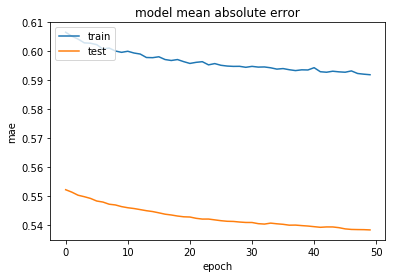

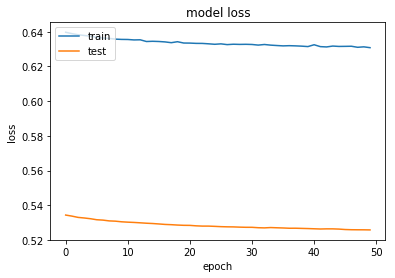

In [119]:
def visualize(history):
  plt.plot(history.history['mean_absolute_error'])
  plt.plot(history.history['val_mean_absolute_error'])
  plt.title('model mean absolute error')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
visualize(history)


In [122]:
result = model.evaluate(X_test, Y_test)
print("Mean squared error is ",result[0])
print("Mean absolute error is ",result[1])

611/611 [==============================] - 3s 6ms/step
Mean squared error is  0.9722265600182616
Mean absolute error is  0.176759410801964


In [97]:
test = X_test[0] # test = np.array([50 inputs])
# test = (test-mean)/std
# test.reshape(1,50,1)

test.shape

(50, 1)

In [118]:
k = model.predict(np.array([test]))
k = k*std+mean
print("average temperature predicted for next 10 year is",k[0])

average temperature predicted for next 10 year is [9.531934 9.523295 9.523295 9.523295 9.523295 9.523295 9.714367 9.629711
 9.523295 9.612493]
